<a href="https://colab.research.google.com/github/Roy12233444/Credit_Card_Approval/blob/main/Credit_Card_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
application = pd.read_csv('/content/application_record.csv')
credit = pd.read_csv('/content/credit_record.csv')

In [4]:
print (credit.describe())
print (application.describe())

                 ID  MONTHS_BALANCE
count  1.048575e+06    1.048575e+06
mean   5.068286e+06   -1.913700e+01
std    4.615058e+04    1.402350e+01
min    5.001711e+06   -6.000000e+01
25%    5.023644e+06   -2.900000e+01
50%    5.062104e+06   -1.700000e+01
75%    5.113856e+06   -7.000000e+00
max    5.150487e+06    0.000000e+00
                 ID   CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  \
count  2.369280e+05  236927.000000      2.369270e+05  236927.000000   
mean   5.651556e+06       0.430057      1.878779e+05  -15994.476852   
std    4.278209e+05       0.730679      1.119689e+05    4184.279015   
min    5.008804e+06       0.000000      2.700000e+04  -25201.000000   
25%    5.290659e+06       0.000000      1.215000e+05  -19480.000000   
50%    5.671562e+06       0.000000      1.620000e+05  -15593.000000   
75%    5.907209e+06       1.000000      2.250000e+05  -12516.000000   
max    6.840318e+06      19.000000      6.750000e+06   -7489.000000   

       DAYS_EMPLOYED  FLAG_MOBIL  FL

In [5]:
print (len(set(application['ID']))) # How many unique ID in application record?
print (len(set(credit['ID']))) # how many unique ID in credit record?
print (len(set(application['ID']).intersection(set(credit['ID'])))) # how many IDs do two tables share?

236928
45985
36105


In [6]:
print(application.columns)
print(credit.columns)

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')
Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')


In [7]:
application.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,5008806,M,Y,Y,0.0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,N,Y,0.0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


In [8]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [9]:
application.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,2.369280e+05,236927.000000,2.369270e+05,236927.000000,236927.000000,236927.0,236927.000000,236927.000000,236927.000000,236927.000000
mean,5.651556e+06,0.430057,1.878779e+05,-15994.476852,60606.107176,1.0,0.212669,0.296121,0.101217,2.199956
std,4.278209e+05,0.730679,1.119689e+05,4184.279015,138798.016636,0.0,0.409196,0.456546,0.301616,0.901453
min,5.008804e+06,0.000000,2.700000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.290659e+06,0.000000,1.215000e+05,-19480.000000,-3104.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.671562e+06,0.000000,1.620000e+05,-15593.000000,-1478.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.907209e+06,1.000000,2.250000e+05,-12516.000000,-377.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,6.840318e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


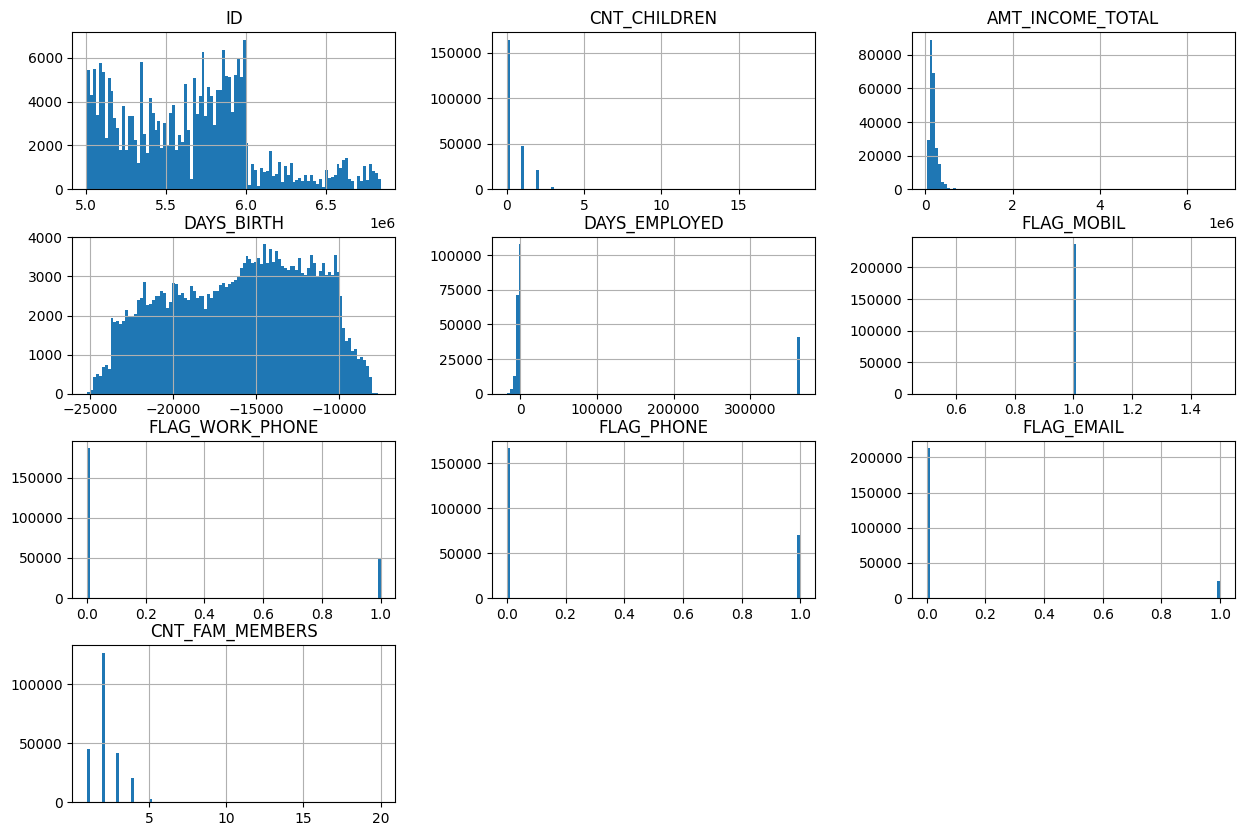

In [10]:
application.hist(bins=100,figsize=(15,10))
plt.show()

In [11]:
application.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN           float64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH             float64
DAYS_EMPLOYED          float64
FLAG_MOBIL             float64
FLAG_WORK_PHONE        float64
FLAG_PHONE             float64
FLAG_EMAIL             float64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

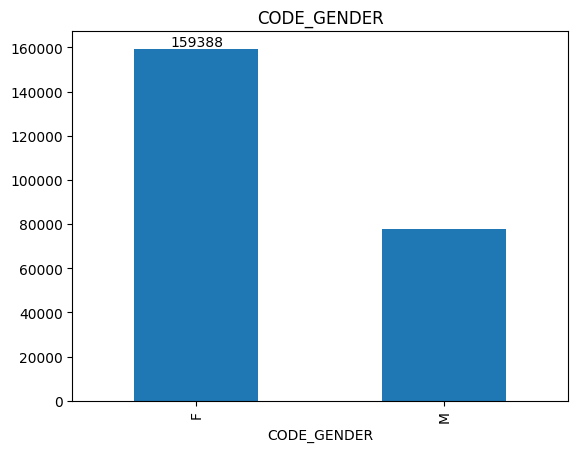

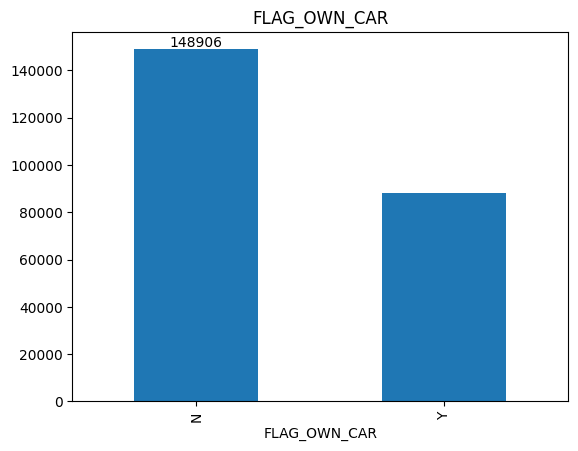

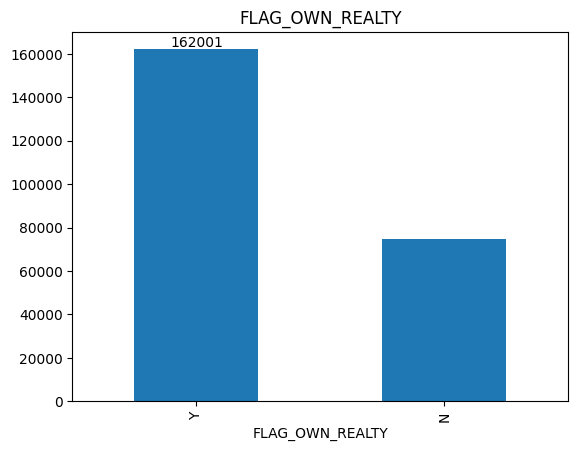

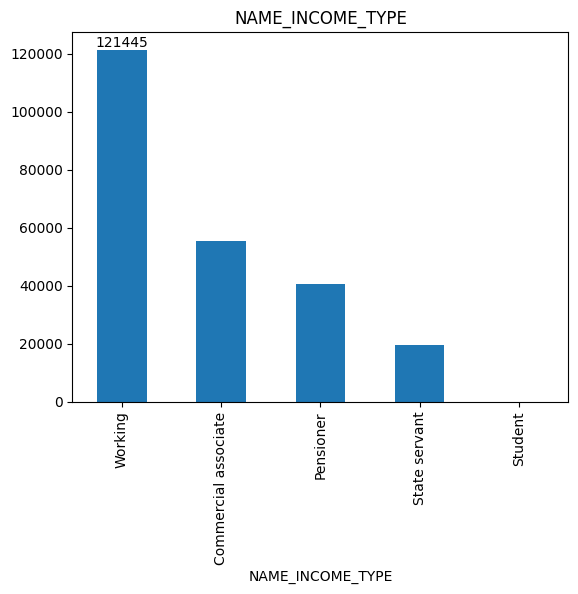

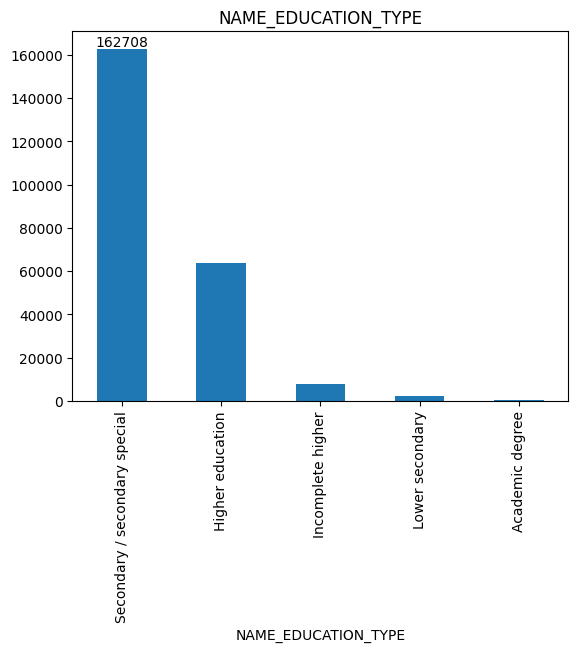

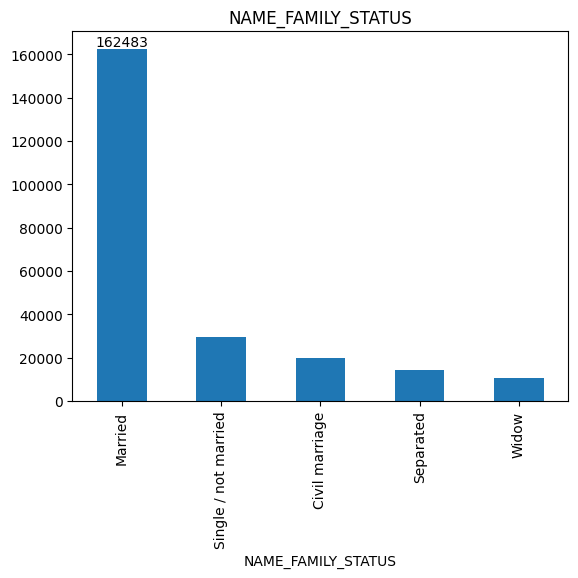

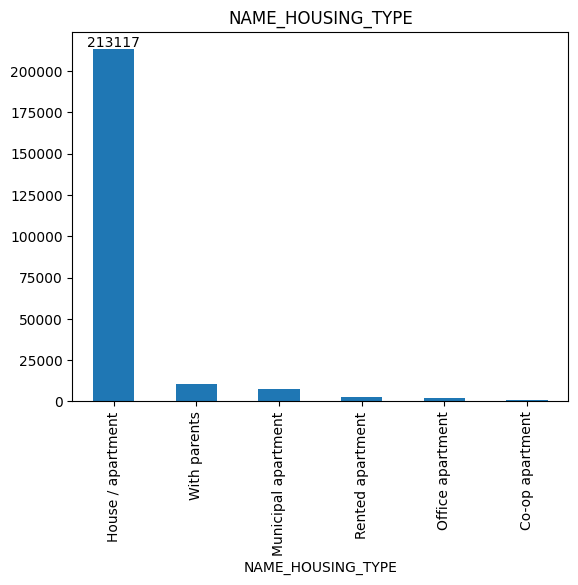

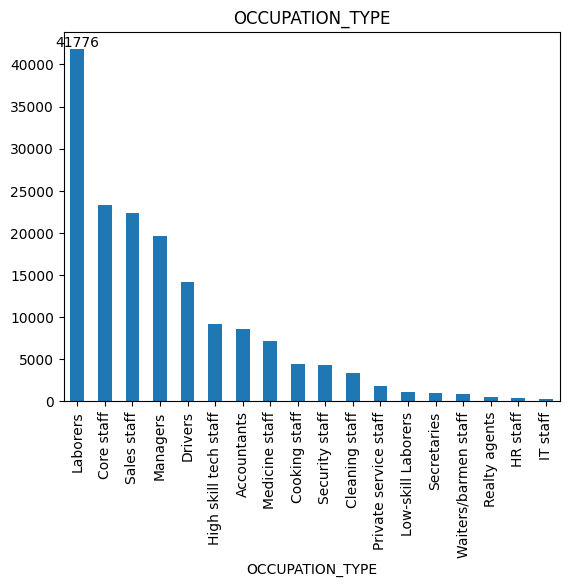

In [12]:
# display all columns have a datatype "object"
import pandas as pd
import matplotlib.pyplot as plt

def display_object(df):
  for column in df.columns:
    if df[column].dtype == 'object':
      value_counts = df[column].value_counts()
      ax = value_counts.plot(kind = 'bar', title=column)
      for i, v in enumerate(value_counts):
        ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
        plt.show()

display_object(application)

In [13]:
application.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

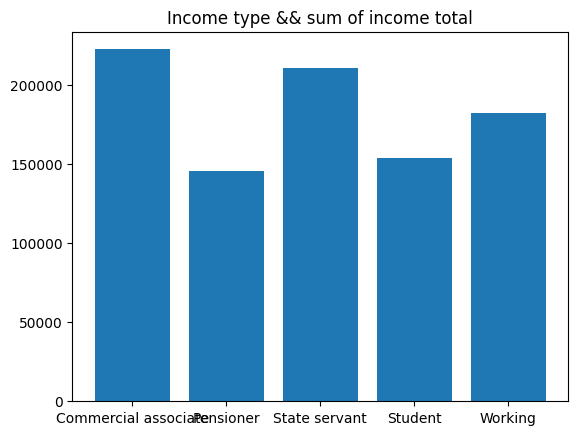

In [14]:
# pd.pivot_table(application, index='NAME_INCOME_TYPE', values='AMT_INCOME_TOTAL')
x=['Commercial associate','Pensioner','State servant','Student','Working']
y=[222334, 145276, 210195, 153692, 182320]
plt.bar(x,y)
plt.title('Income type && sum of income total')
plt.show()

In [15]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


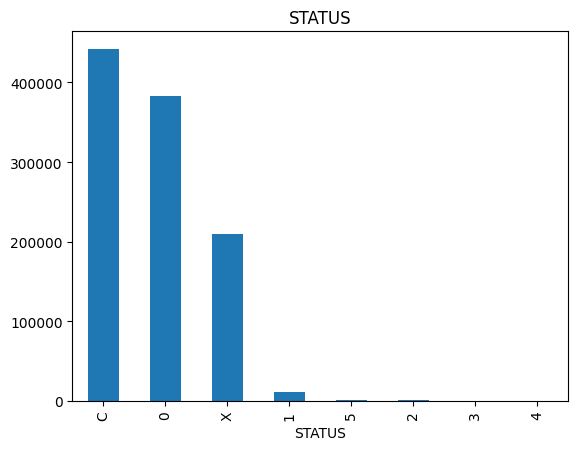

In [16]:
credit['STATUS'].value_counts().plot(kind='bar')
plt.title('STATUS')
plt.show()

In [17]:
grouped = credit.groupby('ID')

In [18]:
## convert credit data to wide format which every ID is a row.
pivot_tb = credit.pivot(index = 'ID', columns = 'MONTHS_BALANCE',values = 'STATUS')

In [19]:
pivot_tb.head()

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-9,-8,-7,-6,-5,-4,-3,-2,-1,0
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,X
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,C,C,C,C,C,C,C,C,C
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,X,X,X
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X


In [20]:
# Convert 'MONTHS_BALANCE' to numeric type
credit['MONTHS_BALANCE'] = pd.to_numeric(credit['MONTHS_BALANCE'], errors='coerce')

# Calculate 'open_month' using the minimum value of 'MONTHS_BALANCE'
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()

In [21]:
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max() # biggest value of MONTHS_BALANCE, might be observe over or canceling account.
pivot_tb['ID']= pivot_tb.index

In [22]:
pivot_tb = pivot_tb[['ID', 'open_month', 'end_month']]

In [23]:
pivot_tb.head()

MONTHS_BALANCE,ID,open_month,end_month
ID,,,
5001711,5001711,-3,0
5001712,5001712,-18,0
5001713,5001713,-21,0
5001714,5001714,-14,0
5001715,5001715,-59,0


In [24]:
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] #calculate observe window

<ipython-input-24-0da482655cf1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] #calculate observe window


In [25]:
pivot_tb.reset_index(drop = True, inplace = True)

In [26]:
credit= pd.merge(credit, pivot_tb, on = 'ID', how = 'left') # join calcualted information

In [27]:
credit.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window
0,5001711,0,X,-3,0,3
1,5001711,-1,0,-3,0,3
2,5001711,-2,0,-3,0,3
3,5001711,-3,0,-3,0,3
4,5001712,0,C,-18,0,18


In [28]:
credit['status'] = np.where((credit['STATUS'] == '2') | (credit['STATUS'] == '3' )| (credit['STATUS'] == '4' )| (credit['STATUS'] == '5'), 1, 0) # analyze > 60 days past due
credit['status'] = credit['status'].astype(np.int8) # 1: overdue 0: not
credit['month_on_book'] = credit['MONTHS_BALANCE'] - credit['open_month'] # calculate month on book: how many months after opening account
credit.sort_values(by = ['ID','month_on_book'], inplace = True)
credit0 = credit.copy()
credit0.head()

,ID,MONTHS_BALANCE,STATUS,open_month,end_month,window,status,month_on_book
3,5001711,-3,0,-3,0,3,0,0
2,5001711,-2,0,-3,0,3,0,1
1,5001711,-1,0,-3,0,3,0,2
0,5001711,0,X,-3,0,3,0,3
22,5001712,-18,0,-18,0,18,0,0


In [29]:
# count how many users in every m0onth the account was opened
denominator = pivot_tb.groupby(['open_month']).agg({'ID': ['count']})
denominator.reset_index(inplace = True)
denominator.columns = ['open_month','sta_sum']
print(denominator)

    open_month  sta_sum
0          -60      415
1          -59      406
2          -58      440
3          -57      400
4          -56      470
..         ...      ...
56          -4      874
57          -3      919
58          -2      771
59          -1      686
60           0      370

[61 rows x 2 columns]


In [30]:
credit['application_status'] = credit.groupby('ID')['status'].transform('max')
truncate = credit.loc[credit['application_status']==1,]
not_trunc = credit.loc[credit['application_status']==0,]
print (credit)


              ID  MONTHS_BALANCE STATUS  open_month  end_month  window  \
3        5001711              -3      0          -3          0       3   
2        5001711              -2      0          -3          0       3   
1        5001711              -1      0          -3          0       3   
0        5001711               0      X          -3          0       3   
22       5001712             -18      0         -18          0      18   
...          ...             ...    ...         ...        ...     ...   
1048549  5150487              -4      C         -29          0      29   
1048548  5150487              -3      C         -29          0      29   
1048547  5150487              -2      C         -29          0      29   
1048546  5150487              -1      C         -29          0      29   
1048545  5150487               0      C         -29          0      29   

         status  month_on_book  application_status  
3             0              0                   0  
2    

In [31]:
# Assuming not_trunc and truncate are your DataFrames
dt1 = not_trunc.groupby('ID').agg({
    'month_on_book': ['max'],
    'application_status': ['max']
})
dt1.reset_index(inplace=True)
dt1.columns = ['ID', 'month_on_book', 'application_status']

dt2 = truncate.loc[truncate['status'] == 1].groupby('ID').agg({
    'month_on_book': ['min'],
    'application_status': ['max']
})
dt2.reset_index(inplace=True)
dt2.columns = ['ID', 'month_on_book', 'application_status']

# Concatenate dt1 and dt2 vertically
dt = pd.concat([dt1, dt2], ignore_index=True)

print(dt)

            ID  month_on_book  application_status
0      5001711              3                   0
1      5001712             18                   0
2      5001713             21                   0
3      5001714             14                   0
4      5001715             59                   0
...        ...            ...                 ...
45980  5149834              8                   1
45981  5149838              8                   1
45982  5150049              9                   1
45983  5150238             48                   1
45984  5150337              3                   1

[45985 rows x 3 columns]


In [32]:
dt = pd.merge(dt, application, on = 'ID', how = 'left')
dt.fillna('unknown',inplace=True)
pd.options.display.max_rows = 999
print(dt)

            ID  month_on_book  application_status CODE_GENDER FLAG_OWN_CAR  \
0      5001711              3                   0     unknown      unknown   
1      5001712             18                   0     unknown      unknown   
2      5001713             21                   0     unknown      unknown   
3      5001714             14                   0     unknown      unknown   
4      5001715             59                   0     unknown      unknown   
...        ...            ...                 ...         ...          ...   
45980  5149834              8                   1     unknown      unknown   
45981  5149838              8                   1     unknown      unknown   
45982  5150049              9                   1     unknown      unknown   
45983  5150238             48                   1           F            Y   
45984  5150337              3                   1     unknown      unknown   

      FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL NAME_INCOME

In [33]:
dt.to_csv(r'C:\Users\youssef azam\Desktop\project for ml\result2.csv')

In [34]:
dt.columns

Index(['ID', 'month_on_book', 'application_status', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS'],
      dtype='object')

In [35]:
cc_apps_description = dt.describe()
print(cc_apps_description)

                 ID  month_on_book  application_status
count  4.598500e+04   45985.000000        45985.000000
mean   5.070164e+06      21.467805            0.014505
std    4.543364e+04      15.400588            0.119560
min    5.001711e+06       0.000000            0.000000
25%    5.026147e+06       9.000000            0.000000
50%    5.065737e+06      18.000000            0.000000
75%    5.114024e+06      32.000000            0.000000
max    5.150487e+06      60.000000            1.000000


In [36]:
dt.dtypes

ID                      int64
month_on_book           int64
application_status       int8
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
CNT_CHILDREN           object
AMT_INCOME_TOTAL       object
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
DAYS_BIRTH             object
DAYS_EMPLOYED          object
FLAG_MOBIL             object
FLAG_WORK_PHONE        object
FLAG_PHONE             object
FLAG_EMAIL             object
OCCUPATION_TYPE        object
CNT_FAM_MEMBERS        object
dtype: object

In [37]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   45985 non-null  int64 
 1   month_on_book        45985 non-null  int64 
 2   application_status   45985 non-null  int8  
 3   CODE_GENDER          45985 non-null  object
 4   FLAG_OWN_CAR         45985 non-null  object
 5   FLAG_OWN_REALTY      45985 non-null  object
 6   CNT_CHILDREN         45985 non-null  object
 7   AMT_INCOME_TOTAL     45985 non-null  object
 8   NAME_INCOME_TYPE     45985 non-null  object
 9   NAME_EDUCATION_TYPE  45985 non-null  object
 10  NAME_FAMILY_STATUS   45985 non-null  object
 11  NAME_HOUSING_TYPE    45985 non-null  object
 12  DAYS_BIRTH           45985 non-null  object
 13  DAYS_EMPLOYED        45985 non-null  object
 14  FLAG_MOBIL           45985 non-null  object
 15  FLAG_WORK_PHONE      45985 non-null  object
 16  FLAG

array([[<Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'month_on_book'}>],
       [<Axes: title={'center': 'application_status'}>, <Axes: >]],
      dtype=object)

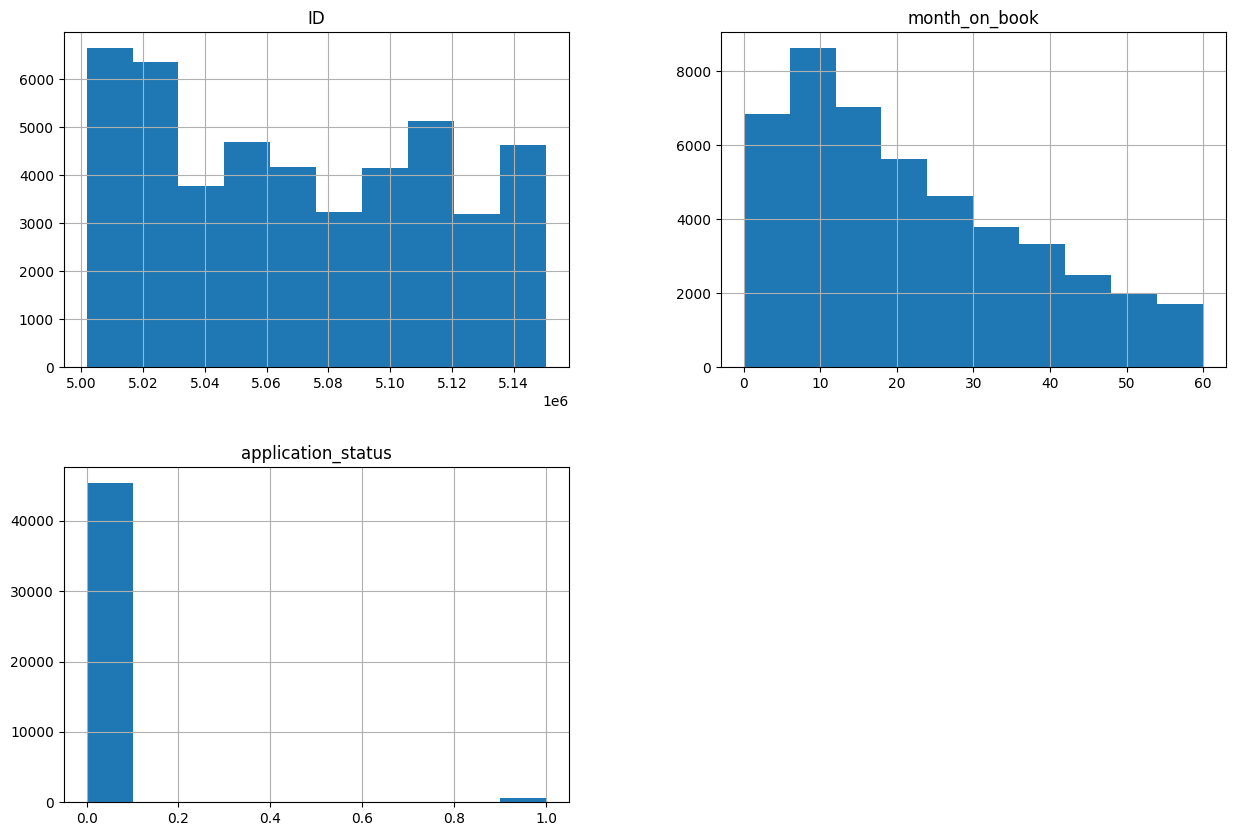

In [38]:
dt.hist(figsize=(15,10))

In [39]:
# # # Handling the missing values in  dataset----------------
# Replace the 'unknown's with NaN
cc_apps = dt.replace('unknown', np.nan)
cc_apps.to_csv(r'C:\Users\youssef azam\Desktop\project for ml\result3.csv')
credit_app = pd.read_csv(r'C:\Users\youssef azam\Desktop\project for ml\result3.csv')
# print (credit_app)
# print (credit_app.describe())
credit_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45985 non-null  int64  
 1   ID                   45985 non-null  int64  
 2   month_on_book        45985 non-null  int64  
 3   application_status   45985 non-null  int64  
 4   CODE_GENDER          36105 non-null  object 
 5   FLAG_OWN_CAR         36105 non-null  object 
 6   FLAG_OWN_REALTY      36105 non-null  object 
 7   CNT_CHILDREN         36105 non-null  float64
 8   AMT_INCOME_TOTAL     36105 non-null  float64
 9   NAME_INCOME_TYPE     36105 non-null  object 
 10  NAME_EDUCATION_TYPE  36105 non-null  object 
 11  NAME_FAMILY_STATUS   36105 non-null  object 
 12  NAME_HOUSING_TYPE    36105 non-null  object 
 13  DAYS_BIRTH           36105 non-null  float64
 14  DAYS_EMPLOYED        36105 non-null  float64
 15  FLAG_MOBIL           36105 non-null 

In [40]:
# # Impute the missing values with mean imputation
# credit_app.fillna(credit_app.mean(), inplace=True)
# credit_app = credit_app.fillna(credit_app.mode().iloc[0])
# print (credit_app)
# credit_app.to_csv(r'C:\Users\youssef azam\Desktop\project for ml\result6.csv')

In [41]:
# #  Preprocessing the data--------
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Convert the non-numeric data into numeric--------
# Iterate over all the values of each column and extract their dtypes
for col in credit_app.columns:
    # Compare if the dtype is object
    if credit_app[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        credit_app[col]=le.fit_transform(credit_app[col])

print(credit_app.info())
credit_app.to_csv(r'C:\Users\youssef azam\Desktop\project for ml\result5.csv')
credit_processing  = pd.read_csv(r'C:\Users\youssef azam\Desktop\project for ml\result5.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45985 entries, 0 to 45984
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45985 non-null  int64  
 1   ID                   45985 non-null  int64  
 2   month_on_book        45985 non-null  int64  
 3   application_status   45985 non-null  int64  
 4   CODE_GENDER          45985 non-null  int64  
 5   FLAG_OWN_CAR         45985 non-null  int64  
 6   FLAG_OWN_REALTY      45985 non-null  int64  
 7   CNT_CHILDREN         36105 non-null  float64
 8   AMT_INCOME_TOTAL     36105 non-null  float64
 9   NAME_INCOME_TYPE     45985 non-null  int64  
 10  NAME_EDUCATION_TYPE  45985 non-null  int64  
 11  NAME_FAMILY_STATUS   45985 non-null  int64  
 12  NAME_HOUSING_TYPE    45985 non-null  int64  
 13  DAYS_BIRTH           36105 non-null  float64
 14  DAYS_EMPLOYED        36105 non-null  float64
 15  FLAG_MOBIL           36105 non-null 

In [42]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils import resample

# Load the data
credit_app = pd.read_csv(r'C:\Users\youssef azam\Desktop\project for ml\result3.csv')

In [43]:
# Replace 'unknown' values with NaN
credit_app.replace('unkown', np.nan, inplace=True)

# Drop unnecessary columns
credit_app = credit_app.drop(columns=["ID", "CNT_CHILDREN", "NAME_HOUSING_TYPE", "FLAG_WORK_PHONE", "FLAG_PHONE", "FLAG_EMAIL"])

In [44]:
# Reorder columns for clarity
column_names = ["month_on_book", "CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", "AMT_INCOME_TOTAL",
                "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "DAYS_BIRTH", "DAYS_EMPLOYED",
                "FLAG_MOBIL", "OCCUPATION_TYPE", "CNT_FAM_MEMBERS", "application_status"]
credit_app = credit_app.reindex(columns=column_names)

In [45]:
credit_app.head(3)


,month_on_book,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,application_status
0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


application_status
0    45318
1      667
Name: count, dtype: int64


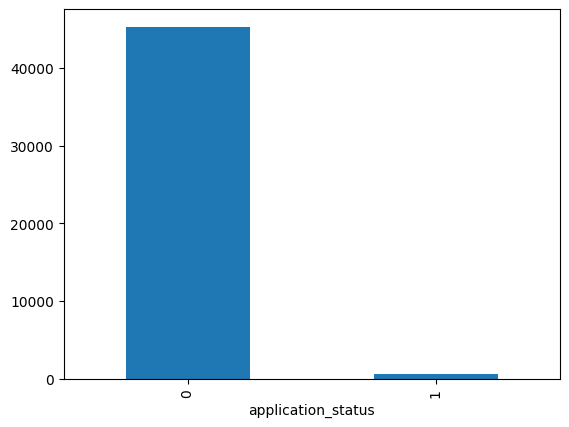

In [46]:
credit_app['application_status'].value_counts().plot(kind='bar')
print(credit_app['application_status'].value_counts())

In [47]:
# Convert non-numeric data into numeric using LabelEncoder
le = LabelEncoder()
for col in credit_app.columns:
    if credit_app[col].dtype == 'object':
        credit_app[col] = le.fit_transform(credit_app[col])

# Save the preprocessed data
credit_app.to_csv(r'C:\Users\DELL\Desktop\credit card project\result5.csv')

In [48]:
# Separate features and target
X, y = credit_app.iloc[:, :-1], credit_app.iloc[:, -1]

# Handle missing values (NaN) - You can customize this based on your preference
X.fillna(X.mean(), inplace=True)

In [49]:
# Create a balanced dataset by oversampling the minority class
X_resampled, y_resampled = resample(X[y == 1], y[y == 1], replace=True, n_samples=X[y == 0].shape[0], random_state=42)

# Concatenate the resampled data with the majority class
X_balanced = pd.concat([X[y == 0], X_resampled])
y_balanced = pd.concat([y[y == 0], y_resampled])

In [50]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [51]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Fit a logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [53]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

In [54]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [55]:
print("Accuracy of logistic regression classifier:", accuracy)

Accuracy of logistic regression classifier: 0.7175639894086496


In [56]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[6675 2451]
 [2669 6333]]


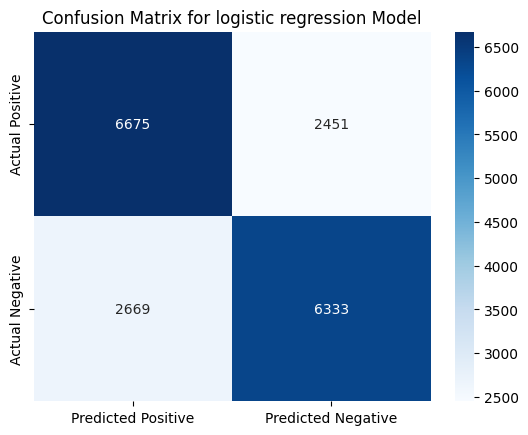

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your confusion matrix
conf_matrix = conf_matrix

# Convert to DataFrame for easier manipulation
conf_df = pd.DataFrame(conf_matrix, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

# Plot the heatmap
sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for logistic regression Model')
plt.show()

In [58]:
# Instantiate Random Forest classifier
random_f = RandomForestClassifier(random_state=42)

In [59]:
random_f.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [60]:
# Make predictions on the test set
y_pred_rf = random_f.predict(X_test_scaled)

In [61]:
print("Training Score:",random_f.score(X_train_scaled,y_train)*100,'%')

Training Score: 96.62382081977161 %


In [62]:
print("Testing Score:",random_f.score(X_test_scaled,y_test)*100,'%')

Testing Score: 96.7067519858782 %


In [63]:
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy of Random Forest classifier:", accuracy_rf)
print("Confusion Matrix for Random Forest:")
print(conf_matrix_rf)

Accuracy of Random Forest classifier: 0.967067519858782
Confusion Matrix for Random Forest:
[[8681  445]
 [ 152 8850]]


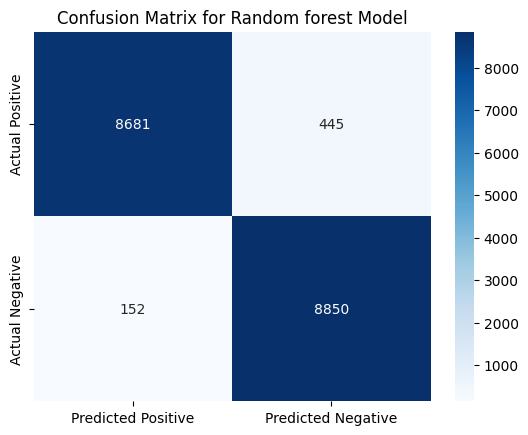

In [64]:
# Your confusion matrix
conf_matrix = conf_matrix_rf

conf_df = pd.DataFrame(conf_matrix_rf, columns=['Predicted Positive', 'Predicted Negative'],
                       index=['Actual Positive', 'Actual Negative'])

sns.heatmap(conf_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Random forest Model')
plt.show()